In [1]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

In [2]:
class AgentState(TypedDict):
    name : str
    number : List[int]
    counter : int
    

In [4]:
def greeting_node(state: AgentState) -> AgentState:
    state["name"] = f"Hi there, {state['name']}"
    state["counter"] = 0

    return state

def random_node(state: AgentState) -> AgentState:
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1

    return state

def should_continue_node(state: AgentState) -> AgentState:
    if state["counter"] < 5:
        print("Entering LOOP", state["counter"])
        return "Loop"
    else:
        return "Exit"

In [6]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)

graph.add_edge("greeting", "random")

graph.add_conditional_edges(
    "random", #Source Node
    should_continue_node, #Routing function (Action)
    {
        "Loop" : "random", #Self loop back to same node
        "Exit" : END #End of the graph
    }
)

graph.set_entry_point("greeting")

app = graph.compile()

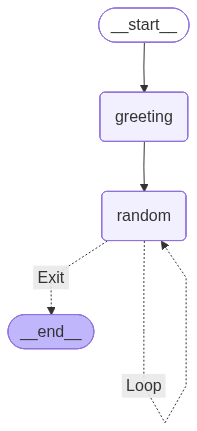

In [7]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
result = app.invoke({"name":"Ronak", "number":[5],"counter":-1})

Entering LOOP 1
Entering LOOP 2
Entering LOOP 3
Entering LOOP 4


In [13]:
result

{'name': 'Hi there, Ronak', 'number': [5, 7, 3, 4, 7, 4], 'counter': 5}

In [14]:
result = app.invoke({"name":"Ronak", "number":[10],"counter":100})

Entering LOOP 1
Entering LOOP 2
Entering LOOP 3
Entering LOOP 4


In [15]:
result

{'name': 'Hi there, Ronak', 'number': [10, 10, 9, 8, 6, 3], 'counter': 5}